# Lab 2: Titanic Dataset Analysis
**Author:** Elen Tesfai  
**Date:** March 15th, 2025

## Objective:
The objective of this lab is to analyze the Titanic dataset and perform data exploration, preprocessing, and feature engineering in order to build a machine learning model that predicts the survival of passengers aboard the RMS Titanic.

## Introduction:
In this project, we will explore the Titanic dataset, which contains information about passengers such as age, sex, passenger class, fare, and more. Our goal is to identify patterns and relationships between these features and the target variable `survived`. We will clean the data by handling missing values, perform feature engineering, and split the data into training and test sets. Finally, we will prepare the data for building a predictive model.

---

### 1. **Import and Inspect the Data**

#### 1.1 **Load the Titanic dataset and display the first 10 rows**

In [1]:

# Import necessary libraries
import seaborn as sns
import pandas as pd

# Load Titanic dataset
titanic = sns.load_dataset('titanic')

# Display the first 10 rows
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


### 1.2 **Check for Missing Values and Display Summary Statistics**

In this step, we'll check for missing values in the dataset and display summary statistics for the numeric columns.


In [2]:
# Check for missing values
print(titanic.isnull().sum())

# Display summary statistics
print(titanic.describe())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64
         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


## 2. Data Exploration and Preparation

### 2.1 Explore Data Patterns and Distributions

#### 1. Scatter Matrix for Numeric Features
A scatter matrix helps us to visually examine the relationships between multiple numeric features (`age`, `fare`, `pclass`).

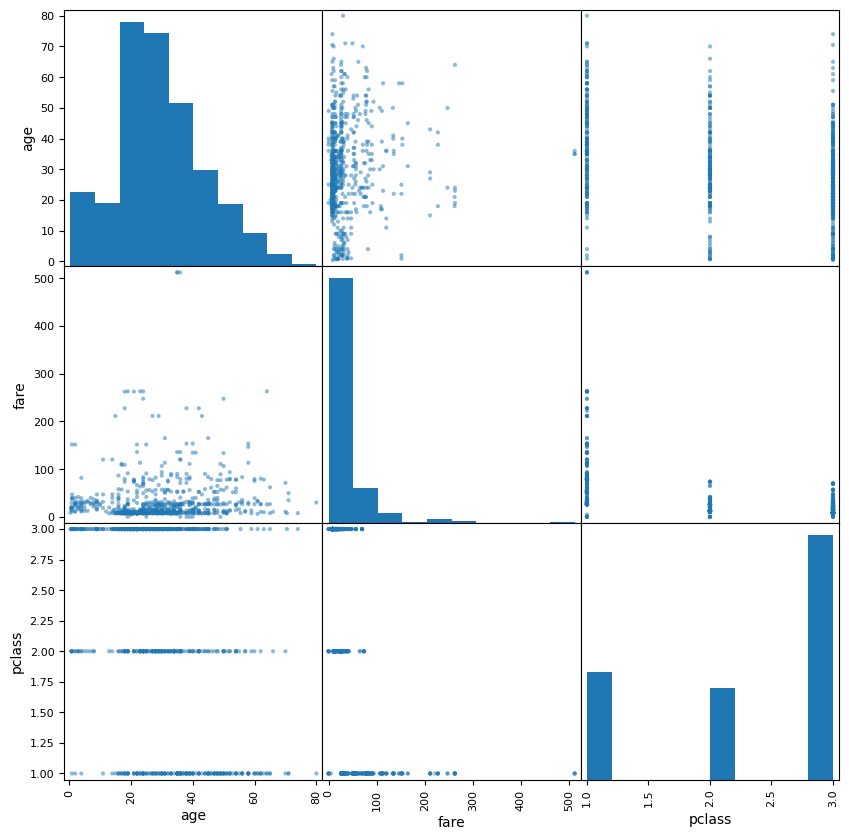

In [3]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

# Choose relevant numeric features
attributes = ['age', 'fare', 'pclass']

# Create the scatter matrix
scatter_matrix(titanic[attributes], figsize=(10, 10))
plt.show()

#### 2. Scatter Plot: Age vs Fare by Gender
Now, let's plot a scatter plot to visualize the relationship between age and fare, colored by gender.

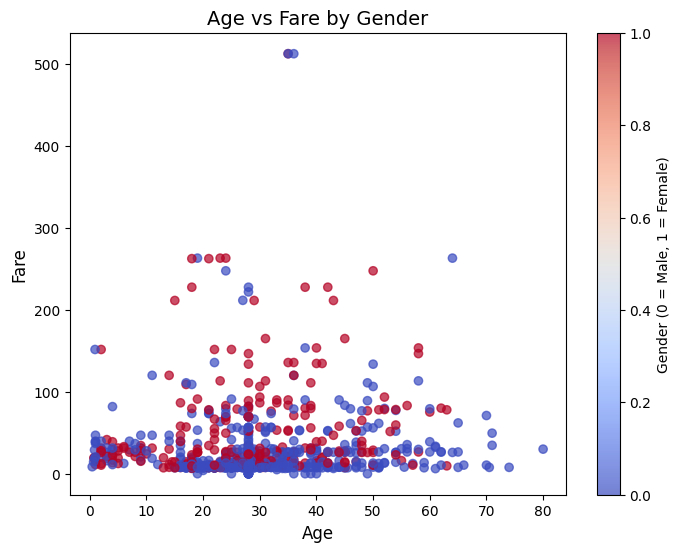

In [28]:
import matplotlib.pyplot as plt

# Create a scatter plot with custom colors for gender
plt.figure(figsize=(8, 6))

# Assign colors based on gender (0 for male, 1 for female)
# Using a colormap to represent the two categories
scatter = plt.scatter(titanic['age'], titanic['fare'], c=titanic['sex'].apply(lambda x: 0 if x == 'male' else 1), cmap='coolwarm', alpha=0.7)

# Add labels and title
plt.xlabel('Age', fontsize=12)
plt.ylabel('Fare', fontsize=12)
plt.title('Age vs Fare by Gender', fontsize=14)

# Add a color bar to represent gender
plt.colorbar(scatter, label='Gender (0 = Male, 1 = Female)')

# Show the plot
plt.show()

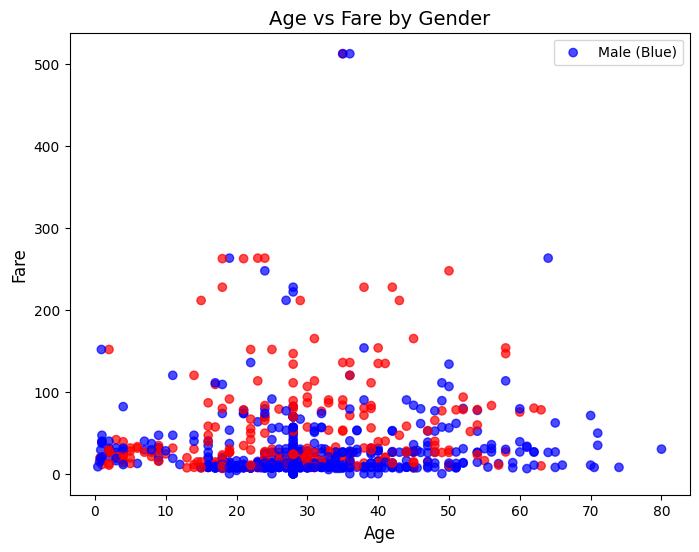

In [30]:
import matplotlib.pyplot as plt

# Create a scatter plot with custom colors
plt.figure(figsize=(8, 6))

# Assign colors based on gender (0 for male, 1 for female)
colors = titanic['sex'].apply(lambda x: 'blue' if x == 'male' else 'red')

# Plot with custom colors
plt.scatter(titanic['age'], titanic['fare'], c=colors, alpha=0.7)

# Add labels and title
plt.xlabel('Age', fontsize=12)
plt.ylabel('Fare', fontsize=12)
plt.title('Age vs Fare by Gender', fontsize=14)

# Add a legend
plt.legend(['Male (Blue)', 'Female (Red)'], loc='upper right')

# Show the plot
plt.show()

#### 3. Histogram of Age
We will now display the distribution of the age feature to understand the age distribution of passengers.

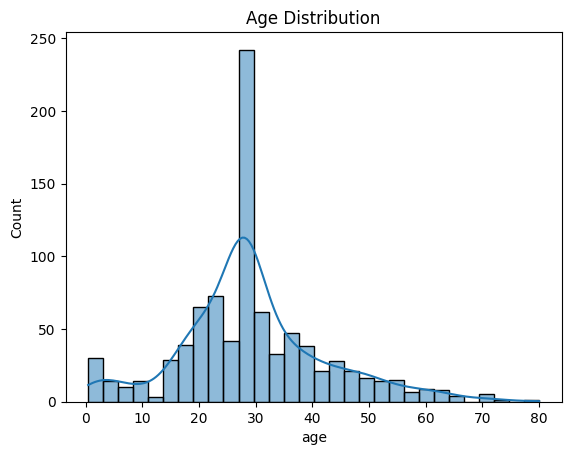

In [18]:
sns.histplot(titanic['age'], kde=True)
plt.title('Age Distribution')
plt.show()

### 4. Count Plot: Class and Survival
This count plot shows the distribution of passengers by class and their survival status. It helps us understand how survival is distributed across different passenger classes. By visualizing the count of survivors and non-survivors within each class, we can explore any potential relationship between passenger class and survival.

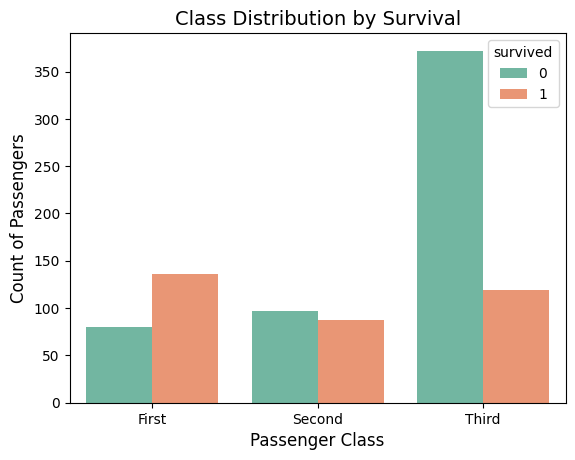

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Customize the color palette for the countplot using 'Set2' palette
sns.countplot(x='class', hue='survived', data=titanic, palette='Set2')

# Adding title and labels
plt.title('Class Distribution by Survival', fontsize=14)
plt.xlabel('Passenger Class', fontsize=12)
plt.ylabel('Count of Passengers', fontsize=12)

# Show the plot
plt.show()

### 5. Boxenplots for Numeric Columns
Boxenplots allow us to visualize the distribution of numeric features and highlight any outliers. We will generate boxenplots for the numeric features `age`, `fare`, and `pclass`.

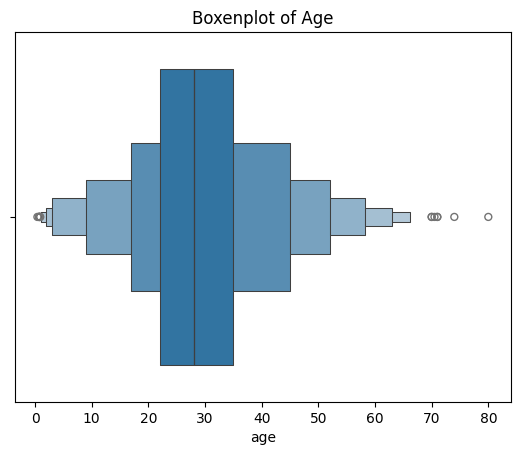

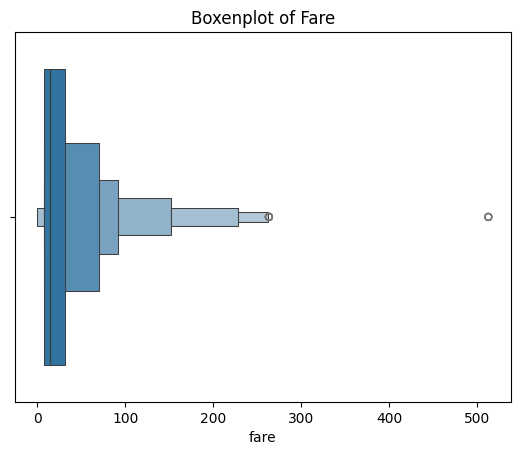

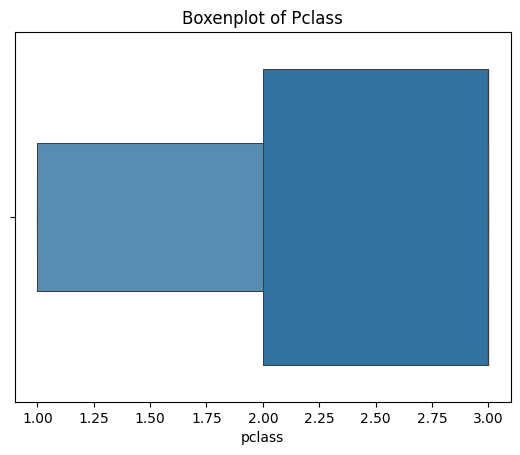

In [25]:
# Generate Boxenplot for 'age'
sns.boxenplot(x=titanic['age'])
plt.title('Boxenplot of Age')
plt.show()

# Generate Boxenplot for 'fare'
sns.boxenplot(x=titanic['fare'])
plt.title('Boxenplot of Fare')
plt.show()

# Generate Boxenplot for 'pclass'
sns.boxenplot(x=titanic['pclass'])
plt.title('Boxenplot of Pclass')
plt.show()

### 6. Correlation Heatmap
A correlation heatmap helps to identify any strong correlations between numeric features. It allows us to visualize the relationships between different numeric variables in the dataset.

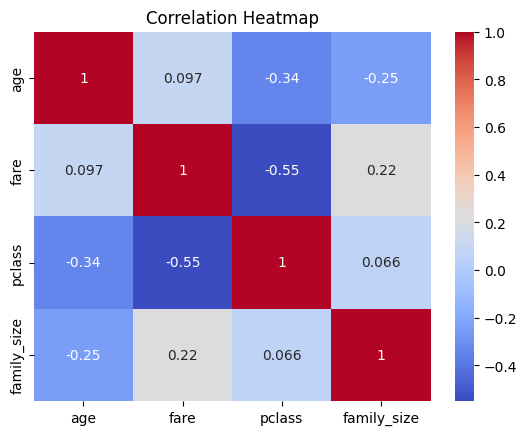

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr = titanic[['age', 'fare', 'pclass', 'family_size']].corr()

# Generate heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## 2.2 **Handle Missing Values and Clean Data**

In this step, we will handle missing values in the dataset by imputing the missing values with appropriate strategies.

### Handle Missing Age Values: Impute missing values for `age` with the median.

Since the `age` feature contains some missing values, we will fill those missing values with the median age. This is a common technique for numerical data, as the median is less sensitive to outliers.


In [5]:
# Impute missing values for 'age' using the median
titanic['age'] = titanic['age'].fillna(titanic['age'].median())

# Check if there are any missing values in 'age'
print(titanic['age'].isnull().sum())

0


### 2.3 Feature Engineering

#### 1. **Create a new feature: Family size**
We will combine the `sibsp` (siblings/spouses) and `parch` (parents/children) features to create a `family_size` feature. This will help us understand the family size of each passenger, which may have influenced their chances of survival.

In [8]:
print(titanic.head())  # Display the first 5 rows of the DataFrame

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  family_size  
0    man        True  NaN  Southampton    no  False            2  
1  woman       False    C    Cherbourg   yes  False            2  
2  woman       False  NaN  Southampton   yes   True            1  
3  woman       False    C  Southampton   yes  False            2  
4    man        True  NaN  Southampton    no   True            1  


#### 2. **Display the first 5 rows of the DataFrame:**
After creating the `family_size` feature, we can display the first 5 rows of the dataset to verify that the new feature has been correctly added.

In [10]:
print(titanic.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  family_size  
0    man        True  NaN  Southampton    no  False            2  
1  woman       False    C    Cherbourg   yes  False            2  
2  woman       False  NaN  Southampton   yes   True            1  
3  woman       False    C  Southampton   yes  False            2  
4    man        True  NaN  Southampton    no   True            1  


### 3. Feature Selection and Justification

#### 3.1 Choose Features and Target
We need to define the input features (X) and the target variable (y) for the machine learning model.

- **Target Variable (y)**: The target variable is `survived`, which indicates whether a passenger survived (1) or not (0).
- **Input Features (X)**: The input features will be `age`, `fare`, `pclass`, `sex`, and `family_size`. These are the columns that we believe might influence the survival rate.

##### Define X and y

In [11]:
# Define input features (X) and target variable (y)
X = titanic[['age', 'fare', 'pclass', 'sex', 'family_size']]
y = titanic['survived']

### 1. **Check the first few rows of X and y**

We will check the first few rows of the input features (X) and the target variable (y) to verify the selections.


In [13]:
# Display the first 5 rows of the features (X)
print(X.head())

# Display the first 5 rows of the target variable (y)
print(y.head())

    age     fare  pclass     sex  family_size
0  22.0   7.2500       3    male            2
1  38.0  71.2833       1  female            2
2  26.0   7.9250       3  female            1
3  35.0  53.1000       1  female            2
4  35.0   8.0500       3    male            1
0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64


### 2. **Check the shapes of X and y**

We will check the shapes of the input features (X) and the target variable (y) to ensure that they are correctly aligned and ready for model training.

In [14]:
# Check the shape of the features (X)
print(X.shape)

# Check the shape of the target variable (y)
print(y.shape)

(891, 5)
(891,)


- **X.shape = (891, 5):** This means you have 891 rows (data points) and 5 columns (features) in the input data.
- **y.shape = (891,):** This means you have 891 rows (data points) in the target variable, which corresponds to the number of data points in X.

### 4. **Splitting**

#### 4.1 **Train/Test Split**
We’ll use `train_test_split` to split the data into training and test sets.


In [15]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print(f'Train size: {len(X_train)}')
print(f'Test size: {len(X_test)}')

Train size: 712
Test size: 179


- **Train size: 712**: This means 712 data points are in the training set.
- **Test size: 179**: This means 179 data points are in the test set.

This split reflects the 80%/20% ratio specified by `test_size=0.2`, with 80% of the data used for training and 20% for testing.

### 4.2 Stratified Train/Test Split

We will use `StratifiedShuffleSplit` to ensure the class distribution is preserved in both the training and test sets.

- Perform the stratified split by using `StratifiedShuffleSplit` with `n_splits=1` (one split) and `test_size=0.2` (20% for the test set).
- The `splitter.split(X, y)` method is used to generate indices for training and testing sets while preserving the class distribution in the target variable `y`.


In [16]:
from sklearn.model_selection import StratifiedShuffleSplit

# Perform stratified split
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X, y):
    X_train_stratified = X.iloc[train_indices]
    X_test_stratified = X.iloc[test_indices]
    y_train_stratified = y.iloc[train_indices]
    y_test_stratified = y.iloc[test_indices]

print(f'Stratified Train size: {len(X_train_stratified)}')
print(f'Stratified Test size: {len(X_test_stratified)}')

Stratified Train size: 712
Stratified Test size: 179


After performing the stratified split, we obtained the following sizes for the training and test sets:

- **Stratified Train size: 712**: This means 712 data points are in the training set.
- **Stratified Test size: 179**: This means 179 data points are in the test set.

This split ensures that the class distribution is preserved in both the training and test sets, maintaining the original distribution of the target variable (`survived`).

## Conclusion

In this lab, we analyzed the Titanic dataset to understand factors influencing passenger survival. Key findings include:

- **Gender**: Females had a higher survival rate than males.
- **Passenger Class**: First-class passengers had a higher chance of survival.
- **Age & Fare**: Younger passengers and those who paid higher fares tended to survive more.
- **Family Size**: Passengers traveling alone were more likely to survive.

We handled missing values, created new features like `family_size`, and converted categorical variables into numerical values. The data was then split into training and test sets using stratified sampling.

This analysis prepares the dataset for building a predictive model, which can be used to predict survival based on these factors.